<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Semesterarbeit/Datenanalyse_%C3%96V_250222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import der Daten und grundlegende Analyse

### 1. Import & Daten einlesen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV einlesen
df_raw = pd.read_csv("Verkehrs_Daten_2024.csv", sep=",", low_memory=False)

# Datumsfelder konvertieren
df_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_raw["ABFAHRTSZEIT"], format="%d.%m.%Y %H:%M", errors="coerce")
df_raw["AB_PROGNOSE"] = pd.to_datetime(df_raw["AB_PROGNOSE"], format="%d.%m.%Y %H:%M:%S", errors="coerce")

# Unnötige Spalten entfernen
df_raw = df_raw.drop(columns=["ANKUNFTSZEIT", "AN_PROGNOSE", "AN_PROGNOSE_STATUS"])

### 2. Überblick & Metainfos

In [2]:
# Übersicht
display(df_raw.head())
print(f"Anzahl Zeilen: {len(df_raw)}")
display(df_raw.info())

# Verkehrsmittel, Betriebe, Abkürzungen
print("Verkehrsmittel:", sorted(df_raw["PRODUKT_ID"].unique()))
print("Betriebe:", sorted(df_raw["BETREIBER_NAME"].unique()))
print("Betriebe (Abk.):", sorted(df_raw["BETREIBER_ABK"].unique()))

# Haltestellen
print("Anzahl Haltestellen:", df_raw["HALTESTELLEN_NAME"].nunique())

,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False
1,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Bahnhofstrasse/HB",2024-01-01 10:06:00,2024-01-01 10:06:52,REAL,False
2,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Central",2024-01-01 10:04:00,2024-01-01 10:04:11,REAL,False
3,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Haldenegg",2024-01-01 10:02:00,2024-01-01 10:02:22,REAL,False
4,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Sonneggstrasse",2024-01-01 10:01:00,2024-01-01 10:01:35,REAL,False


Anzahl Zeilen: 32920596
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32920596 entries, 0 to 32920595
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   BETRIEBSTAG         object        
 1   BETREIBER_ABK       object        
 2   BETREIBER_NAME      object        
 3   PRODUKT_ID          object        
 4   LINIEN_TEXT         object        
 5   ZUSATZFAHRT_TF      bool          
 6   FAELLT_AUS_TF       bool          
 7   HALTESTELLEN_NAME   object        
 8   ABFAHRTSZEIT        datetime64[ns]
 9   AB_PROGNOSE         datetime64[ns]
 10  AB_PROGNOSE_STATUS  object        
 11  DURCHFAHRT_TF       bool          
dtypes: bool(3), datetime64[ns](2), object(7)
memory usage: 2.3+ GB


None

Verkehrsmittel: ['Tram']
Betriebe: ['Verkehrsbetriebe Zürich INFO+']
Betriebe (Abk.): ['VBZ    Fpl']
Anzahl Haltestellen: 216


### 3. Linienübersicht je Verkehrsmittel

In [3]:
gruppen = df_raw.groupby("PRODUKT_ID")["LINIEN_TEXT"].unique()
for verkehrsmittel, linien in gruppen.items():
    linien_text = ", ".join(map(str, linien))
    print(f"{verkehrsmittel}: {linien_text}")

Tram: 12, 7, 6, 5, 9, 8, 3, 2, 4, 13, 14, 17, 15, 10, 11, E


### 4. Verspätung berechnen & Zeitraum filtern

In [4]:
# Verspätung in Sekunden
df_raw["VERSPAETUNG_AB"] = (df_raw["ABFAHRTSZEIT"] - df_raw["AB_PROGNOSE"]).dt.total_seconds()

# Nur positive Verspätungen
df_filtered = df_raw[df_raw["VERSPAETUNG_AB"] > 0]

# Betriebstag konvertieren und Zeitraum filtern
df_filtered["BETRIEBSTAG"] = pd.to_datetime(df_filtered["BETRIEBSTAG"])
df_filtered = df_filtered[
    (df_filtered["BETRIEBSTAG"] >= "2022-01-01") & 
    (df_filtered["BETRIEBSTAG"] <= "2025-01-01")
]

display(df_filtered.head())

C:\Users\Donat\AppData\Local\Temp\ipykernel_24536\2363959478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["BETRIEBSTAG"] = pd.to_datetime(df_filtered["BETRIEBSTAG"])


,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False,8.0
24,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,REAL,False,3.0
40,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,REAL,False,3.0
62,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,REAL,False,16.0
63,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,REAL,False,14.0


### 5. Aggregation: Verspätungen > 60s pro Haltestelle

In [5]:
df_filtered_60 = df_filtered[df_filtered["VERSPAETUNG_AB"] > 60]

df_stations = df_filtered_60.groupby("HALTESTELLEN_NAME").agg(
    VERSCHSPAETUNGEN_COUNT=("VERSPAETUNG_AB", "count"),
    AVG_VERSPAETUNG=("VERSPAETUNG_AB", "mean")
).reset_index()

display(df_stations.head())

,HALTESTELLEN_NAME,VERSCHSPAETUNGEN_COUNT,AVG_VERSPAETUNG
0,"Dübendorf, Am Ring",123,101.504065
1,"Dübendorf, Ringwiesen",24,252.791667
2,"Glattbrugg, Bahnhof",112,276.357143
3,"Glattbrugg, Unterriet",132,251.492424
4,Glattpark,310,443.767742


### 6. Koordinaten-Daten einlesen & bereinigen


In [6]:
df_haltepunkt = pd.read_csv("haltepunkt.csv")
df_haltestelle = pd.read_csv("haltestelle.csv")

df_merged_haltestelle = df_haltepunkt.merge(df_haltestelle, on="halt_id", how="left")
df_merged_haltestelle = df_merged_haltestelle.drop(columns=["GPS_Bearing"])

# Zeilen mit fehlenden Koordinaten entfernen
df_merged_haltestelle_clean = df_merged_haltestelle.dropna(subset=["GPS_Latitude", "GPS_Longitude"])

### 7. Merge Haltestellen mit Geodaten

In [8]:
# Namen normalisieren
df_stations_copy = df_stations.copy()
df_merged_haltestelle_copy = df_merged_haltestelle_clean.copy()

df_stations_copy["HALTESTELLEN_NAME_CLEAN"] = df_stations_copy["HALTESTELLEN_NAME"].str.strip().str.lower()
df_merged_haltestelle_copy["halt_lang_CLEAN"] = df_merged_haltestelle_copy["halt_lang"].str.strip().str.lower()

# Duplikate in Koordinaten entfernen
df_coords = df_merged_haltestelle_copy.drop_duplicates(subset=["halt_lang_CLEAN"])[
    ["halt_lang_CLEAN", "GPS_Latitude", "GPS_Longitude"]
]

# Merge durchführen
df_stations_geo = df_stations_copy.merge(
    df_coords,
    left_on="HALTESTELLEN_NAME_CLEAN",
    right_on="halt_lang_CLEAN",
    how="left"
).drop(columns=["HALTESTELLEN_NAME_CLEAN", "halt_lang_CLEAN"])

display(df_stations_geo.head())

,HALTESTELLEN_NAME,VERSCHSPAETUNGEN_COUNT,AVG_VERSPAETUNG,GPS_Latitude,GPS_Longitude
0,"Dübendorf, Am Ring",123,101.504065,47.402021,8.607762
1,"Dübendorf, Ringwiesen",24,252.791667,47.397703,8.604315
2,"Glattbrugg, Bahnhof",112,276.357143,47.431284,8.558508
3,"Glattbrugg, Unterriet",132,251.492424,47.437516,8.560615
4,Glattpark,310,443.767742,47.421259,8.557105


###  8. Fehlende Haltestellen analysieren

In [9]:
stations_clean = df_stations["HALTESTELLEN_NAME"].str.strip().str.lower()
merged_clean = df_merged_haltestelle_clean["halt_lang"].str.strip().str.lower()

fehlende_haltestellen = df_stations[~stations_clean.isin(merged_clean)]

display(fehlende_haltestellen[["HALTESTELLEN_NAME"]])
print(f"Nicht gematchte Haltestellen: {len(fehlende_haltestellen)}")

,HALTESTELLEN_NAME
7,"Maiacher, Station"
8,Neue Forch
15,Spital Zollikerberg
16,Waldburg
23,Zollikerberg
24,Zumikon
61,"Zürich, Brunnenhof"
151,"Zürich, Renggerstrasse"
191,"Zürich, Ueberlandpark"


Nicht gematchte Haltestellen: 9


### 9. KeplerGL Karte

In [11]:
import keplergl

df_map = df_stations_geo.dropna(subset=["GPS_Latitude", "GPS_Longitude"]).copy()
df_map["VERSCHSPAETUNGEN_COUNT"] = df_map["VERSCHSPAETUNGEN_COUNT"].astype(int)
df_map["AVG_VERSPAETUNG"] = df_map["AVG_VERSPAETUNG"].astype(float)

map_ = keplergl.KeplerGl(height=600)
map_.add_data(data=df_map, name="Verspätungen pro Haltestelle")
map_

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Verspätungen pro Haltestelle': {'index': [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 17, 18, …

### 10. Balkendiagramm: Häufigste verspätete Haltestellen

C:\Users\Donat\AppData\Local\Temp\ipykernel_24536\268579706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VERSCHSPAETUNGEN_COUNT", y="HALTESTELLEN_NAME", data=df_station_delays, palette="Blues_r")


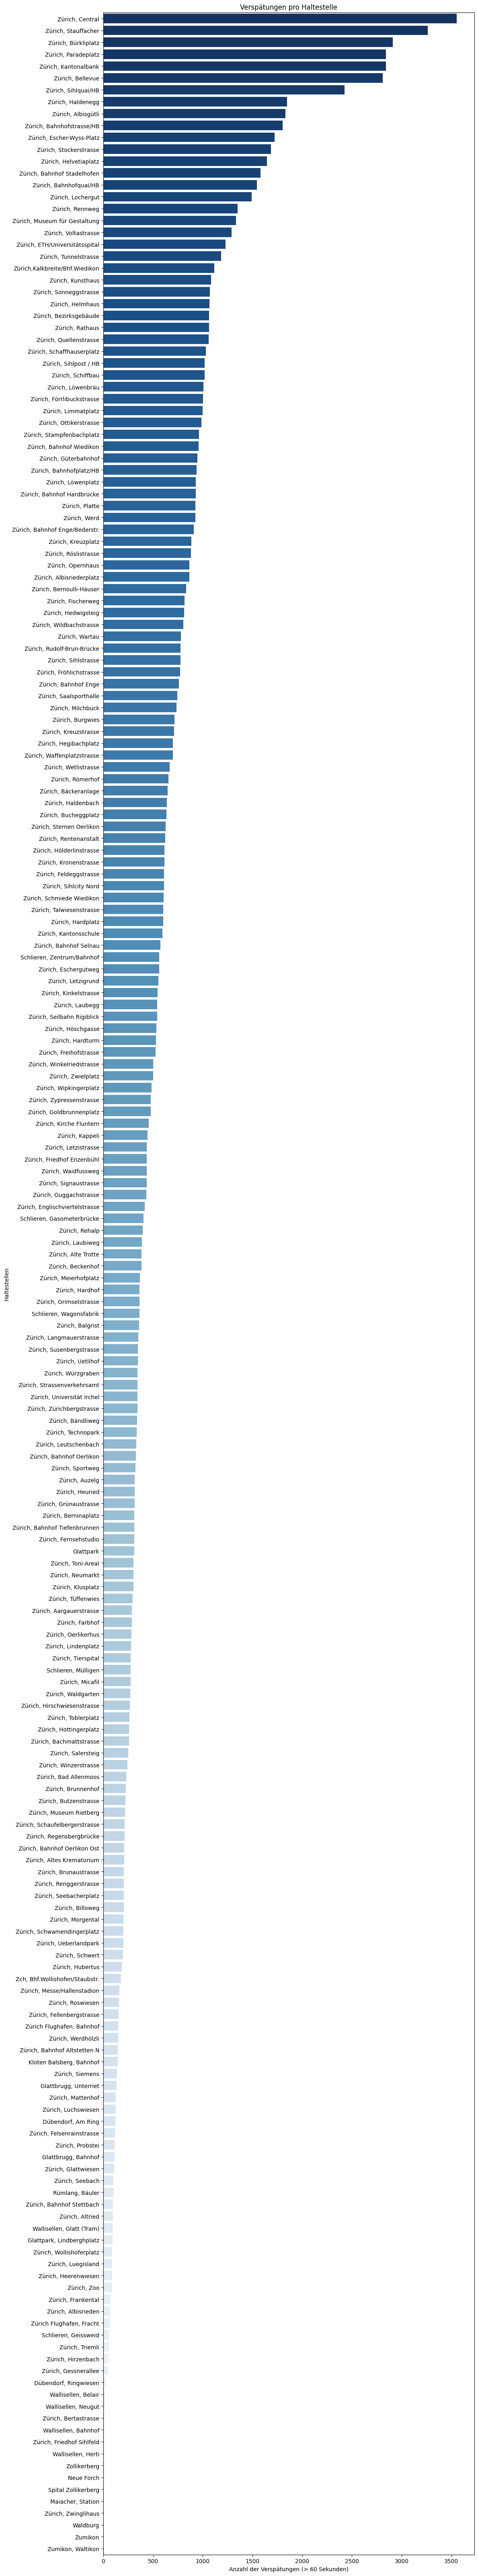

In [12]:
df_station_delays = df_filtered_60.groupby("HALTESTELLEN_NAME").size().reset_index(name="VERSCHSPAETUNGEN_COUNT")
df_station_delays = df_station_delays.sort_values(by="VERSCHSPAETUNGEN_COUNT", ascending=False)

plt.figure(figsize=(12, len(df_station_delays) * 0.3))
sns.barplot(x="VERSCHSPAETUNGEN_COUNT", y="HALTESTELLEN_NAME", data=df_station_delays, palette="Blues_r")
plt.xlabel("Anzahl der Verspätungen (> 60 Sekunden)")
plt.ylabel("Haltestellen")
plt.title("Verspätungen pro Haltestelle")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Analyse der Daten

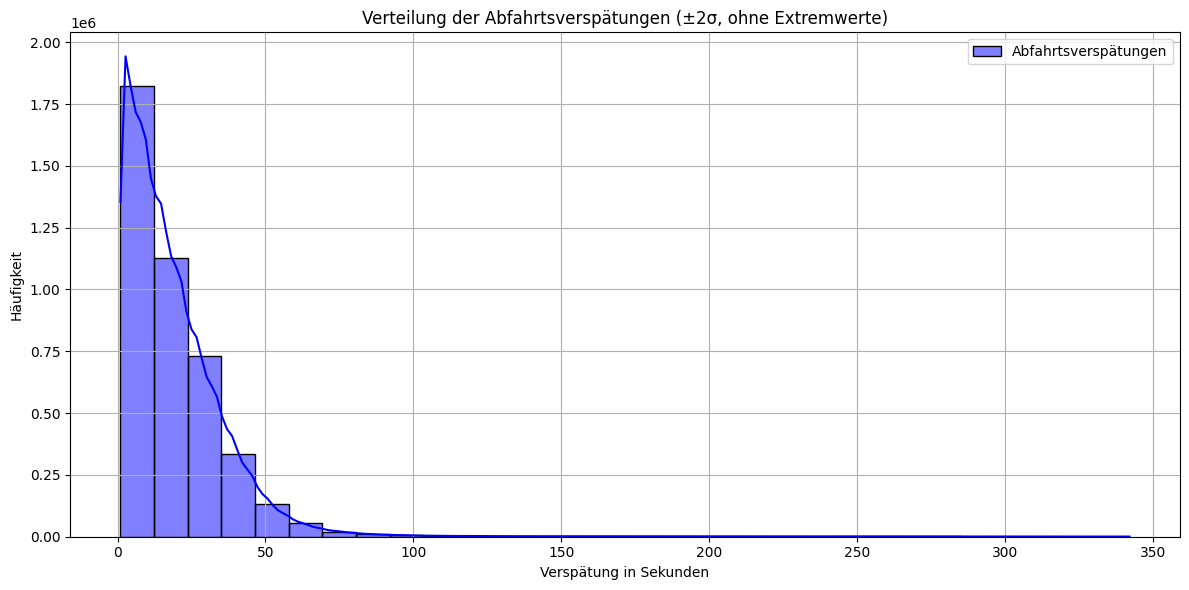

In [13]:
# 📊 Funktion zur Filterung von Extremwerten (Outlier)
def filter_extreme_values(dataframe, column, std_threshold=2):
    """
    Filtert die Daten, um nur Werte innerhalb von `std_threshold` Standardabweichungen vom Mittelwert zu behalten.
    """
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# 🔹 Wende die Funktion auf das bestehende Verspätungs-DataFrame an
df_filtered_vbz_ab_cleaned = filter_extreme_values(df_filtered, "VERSPAETUNG_AB", std_threshold=2)

# 🔹 Plot für bereinigte Abfahrtsverspätungen
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered_vbz_ab_cleaned["VERSPAETUNG_AB"], bins=30, kde=True, color='blue', label='Abfahrtsverspätungen')
plt.title("Verteilung der Abfahrtsverspätungen (±2σ, ohne Extremwerte)")
plt.xlabel("Verspätung in Sekunden")
plt.ylabel("Häufigkeit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
# 📊 Funktion zur Berechnung der Extremwerte und des Schwellenwerts
def calculate_extremes(dataframe, column, std_threshold=2):
    """
    Gibt Anzahl der Extremwerte und den Schwellenwert (±X Sekunden) zurück.
    """
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std

    # Finde Extremwerte außerhalb des Bereichs
    extreme_values = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    num_extremes = len(extreme_values)

    # Maximaler Schwellenwert nach oben/unten
    extreme_threshold = max(abs(lower_bound), abs(upper_bound))

    return num_extremes, extreme_threshold

# 🔹 Anzahl aller Datenpunkte (Verspätungen > 0 Sek.)
anzahl_datenpunkte_ab = len(df_filtered)

# 🔹 Extremwertanalyse (±2 Standardabweichungen)
num_extremes_ab, threshold_ab = calculate_extremes(df_filtered, "VERSPAETUNG_AB", std_threshold=2)

# 🔹 Ausgabe
print(f"Anzahl der Extremwerte bei Abfahrtsverspätungen: {num_extremes_ab} von {anzahl_datenpunkte_ab}")
print(f"Extremwerte liegen außerhalb von ±{threshold_ab:.2f} Sekunden.")


Anzahl der Extremwerte bei Abfahrtsverspätungen: 20476 von 4289155
Extremwerte liegen außerhalb von ±342.67 Sekunden.


In [15]:


# Filtere alle Zeilen, in denen die Verspätung > 5 Minuten (300sekunden) ist
df_greater_5_ab = df_filtered[df_filtered["VERSPAETUNG_AB"] > 300]

# Anzahl der betroffenen Zeilen
count_ab = len(df_greater_5_ab)

print(f"Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: {count_ab}")

Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: 23384


In [16]:
#Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_filtered["ABFAHRTSZEIT_aggregiert"] = df_filtered["ABFAHRTSZEIT"].dt.floor("H")
display(df_filtered.head(10))

C:\Users\Donat\AppData\Local\Temp\ipykernel_24536\2071170404.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_filtered["ABFAHRTSZEIT_aggregiert"] = df_filtered["ABFAHRTSZEIT"].dt.floor("H")


,BETRIEBSTAG,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,ABFAHRTSZEIT_aggregiert
0,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,12,False,False,Glattpark,2024-01-01 11:33:00,2024-01-01 11:32:52,REAL,False,8.0,2024-01-01 11:00:00
24,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 09:36:00,2024-01-01 09:35:57,REAL,False,3.0,2024-01-01 09:00:00
40,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,True,"Zürich, Rennweg",2024-01-01 10:42:00,2024-01-01 10:41:57,REAL,False,3.0,2024-01-01 10:00:00
62,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 09:29:00,2024-01-01 09:28:44,REAL,False,16.0,2024-01-01 09:00:00
63,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 09:28:00,2024-01-01 09:27:46,REAL,False,14.0,2024-01-01 09:00:00
64,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Röslistrasse",2024-01-01 09:26:00,2024-01-01 09:25:56,REAL,False,4.0,2024-01-01 09:00:00
65,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Ottikerstrasse",2024-01-01 09:25:00,2024-01-01 09:24:58,REAL,False,2.0,2024-01-01 09:00:00
86,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schwamendingerplatz",2024-01-01 08:06:00,2024-01-01 08:05:37,REAL,False,23.0,2024-01-01 08:00:00
91,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Guggachstrasse",2024-01-01 07:59:00,2024-01-01 07:58:54,REAL,False,6.0,2024-01-01 07:00:00
92,2024-01-01,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,7,False,False,"Zürich, Schaffhauserplatz",2024-01-01 07:58:00,2024-01-01 07:57:50,REAL,False,10.0,2024-01-01 07:00:00


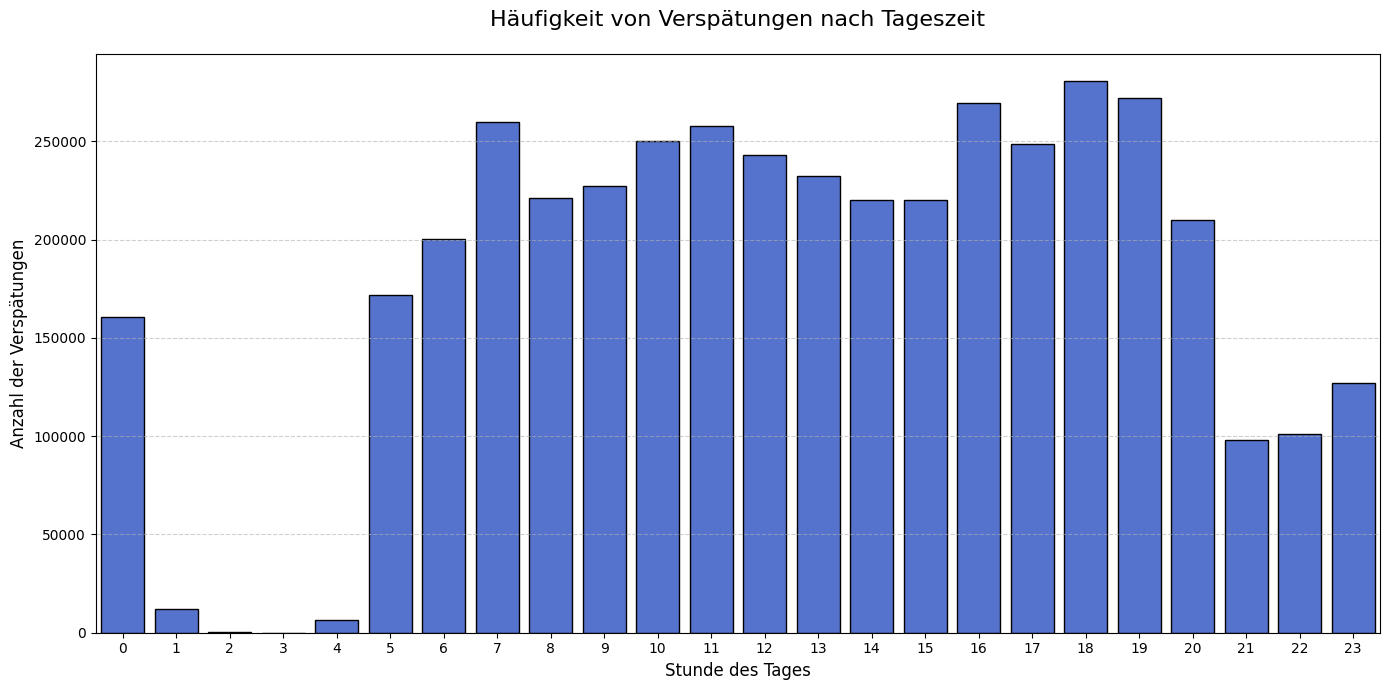

In [17]:
# 📆 Stunde aus der tatsächlichen Abfahrtszeit extrahieren
df_filtered["ABFAHRTSZEIT_STUNDE"] = df_filtered["ABFAHRTSZEIT"].dt.hour

# 🔢 Verspätungen pro Stunde zählen
delay_counts = (
    df_filtered
    .groupby("ABFAHRTSZEIT_STUNDE")
    .size()
    .reset_index(name="Anzahl_Verspaetungen")
)

# 🔄 Sicherstellen, dass alle 24 Stunden enthalten sind
all_hours = pd.DataFrame({"ABFAHRTSZEIT_STUNDE": range(24)})
delay_counts = all_hours.merge(delay_counts, on="ABFAHRTSZEIT_STUNDE", how="left").fillna(0)

# 🔹 Plot: Häufigkeit von Verspätungen je Stunde
plt.figure(figsize=(14, 7))
sns.barplot(
    x="ABFAHRTSZEIT_STUNDE",
    y="Anzahl_Verspaetungen",
    data=delay_counts,
    color="royalblue",
    edgecolor="black"
)

# 🧾 Formatierung
plt.title("Häufigkeit von Verspätungen nach Tageszeit", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Anzahl der Verspätungen", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\Donat\AppData\Local\Temp\ipykernel_24536\2170181103.py:48: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Donat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


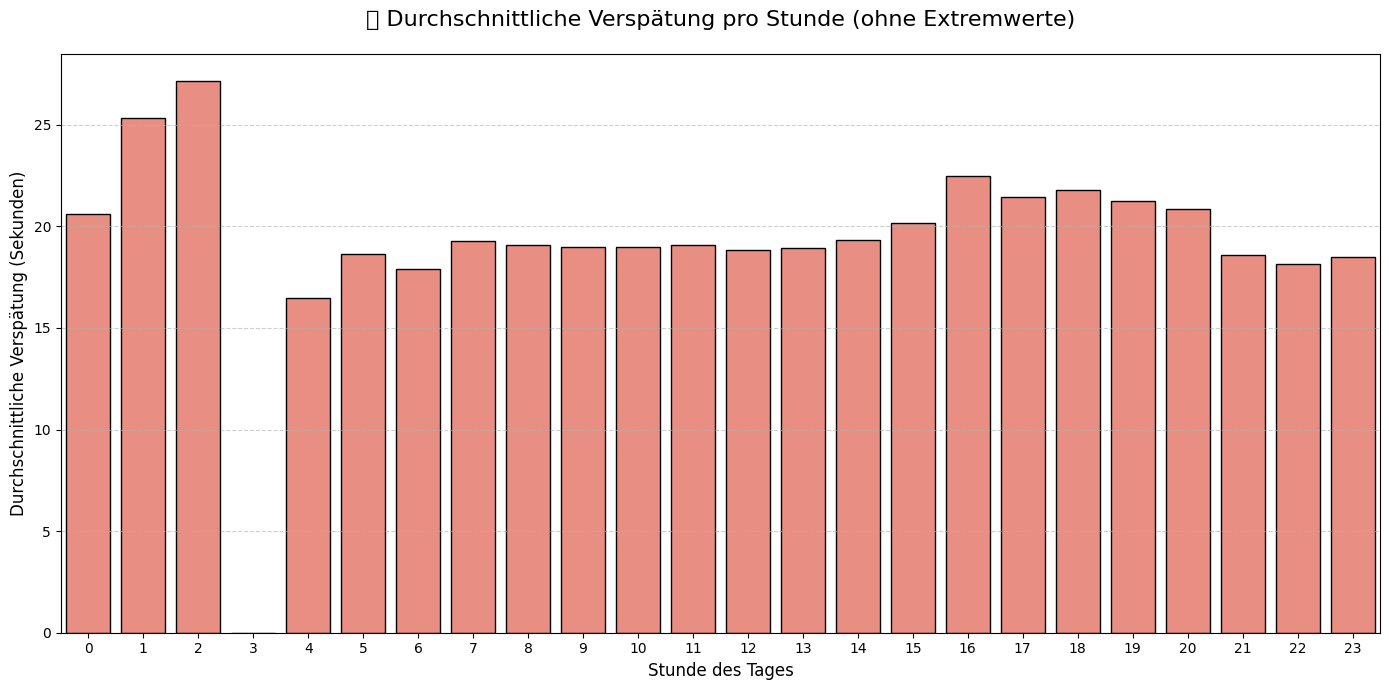

In [18]:
# 🔁 Stelle sicher, dass die Stunde extrahiert ist
df_filtered["ABFAHRTSZEIT_STUNDE"] = df_filtered["ABFAHRTSZEIT"].dt.hour

# ⏳ Schritt 1: Extremwerte in der Verspätung erkennen
mean_delay = df_filtered["VERSPAETUNG_AB"].mean()
std_delay = df_filtered["VERSPAETUNG_AB"].std()

# 🔹 Outlier-Grenze: ±2 Standardabweichungen
lower_bound = mean_delay - 2 * std_delay
upper_bound = mean_delay + 2 * std_delay

# 🔍 Schritt 2: Nur realistische Werte behalten
df_no_outliers = df_filtered[
    (df_filtered["VERSPAETUNG_AB"] >= lower_bound) &
    (df_filtered["VERSPAETUNG_AB"] <= upper_bound)
]

# 📊 Schritt 3: Durchschnittliche Verspätung pro Stunde berechnen
avg_delay_by_hour = (
    df_no_outliers
    .groupby("ABFAHRTSZEIT_STUNDE")["VERSPAETUNG_AB"]
    .mean()
    .reset_index(name="Durchschnittliche_Verspaetung")
)

# 🔄 Alle Stunden sicherstellen
all_hours = pd.DataFrame({"ABFAHRTSZEIT_STUNDE": range(24)})
avg_delay_by_hour = all_hours.merge(avg_delay_by_hour, on="ABFAHRTSZEIT_STUNDE", how="left").fillna(0)

# 📈 Plot: Durchschnittliche Verspätung pro Stunde (ohne Extremwerte)
plt.figure(figsize=(14, 7))
sns.barplot(
    x="ABFAHRTSZEIT_STUNDE",
    y="Durchschnittliche_Verspaetung",
    data=avg_delay_by_hour,
    color="salmon",
    edgecolor="black"
)

# 🎨 Formatierung
plt.title("⏱️ Durchschnittliche Verspätung pro Stunde (ohne Extremwerte)", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Durchschnittliche Verspätung (Sekunden)", fontsize=12)
plt.xticks(range(24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\Donat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


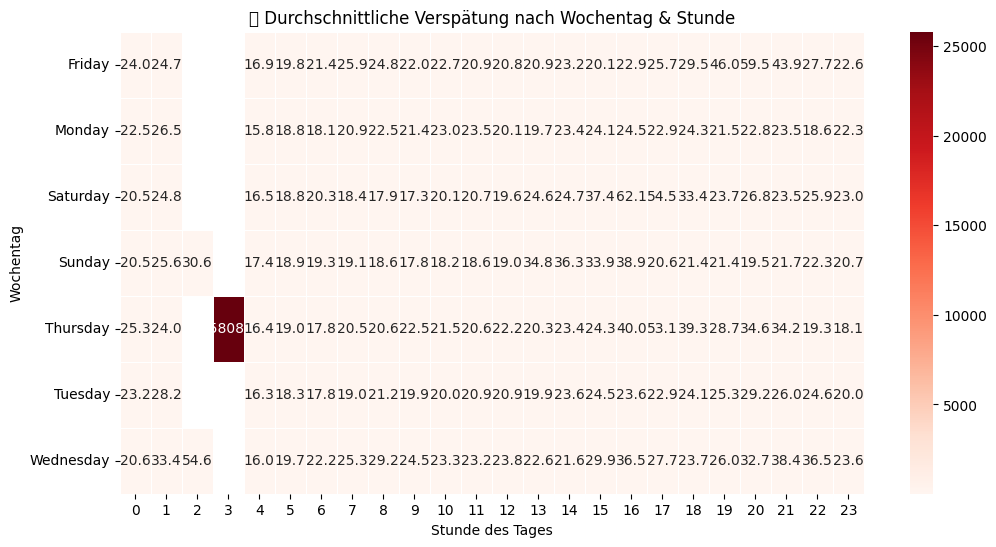

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📆 Wochentag + Stunde extrahieren
df_filtered["WOCHENTAG"] = df_filtered["ABFAHRTSZEIT"].dt.day_name()
df_filtered["STUNDE"] = df_filtered["ABFAHRTSZEIT"].dt.hour

# 🔢 Mittlere Verspätung pro Wochentag & Stunde berechnen
heatmap_data = df_filtered.pivot_table(
    index="WOCHENTAG",
    columns="STUNDE",
    values="VERSPAETUNG_AB",
    aggfunc="mean"
)

# 🔥 Heatmap erstellen
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, annot=True, fmt=".1f")
plt.title("⏳ Durchschnittliche Verspätung nach Wochentag & Stunde")
plt.xlabel("Stunde des Tages")
plt.ylabel("Wochentag")
plt.show()

### Heatmap ohne Ausreisser um 3 Uhr Nachts

C:\Users\Donat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


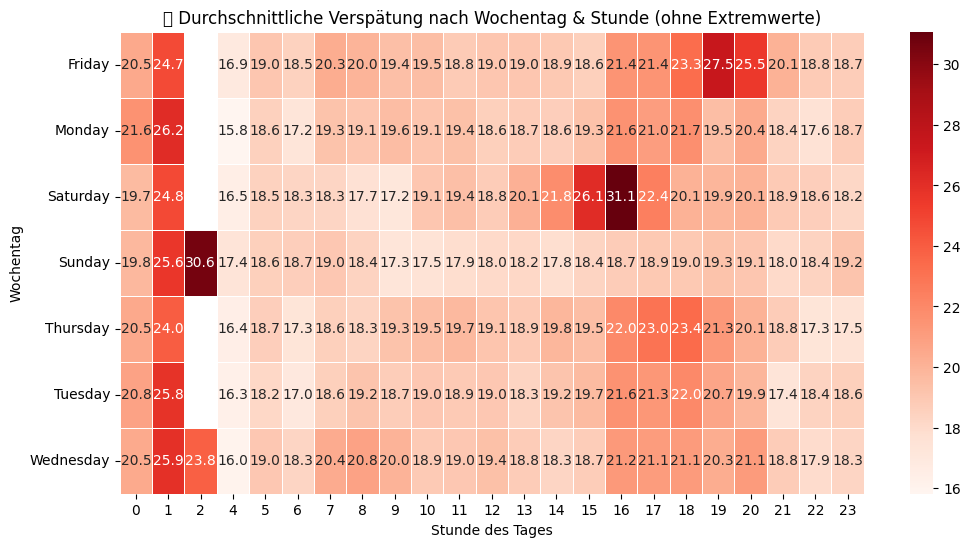

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📆 Wochentag + Stunde extrahieren (falls noch nicht gemacht)
df_filtered["WOCHENTAG"] = df_filtered["ABFAHRTSZEIT"].dt.day_name()
df_filtered["STUNDE"] = df_filtered["ABFAHRTSZEIT"].dt.hour

# 🛠 Schritt 1: Extremwerte erkennen (2 Standardabweichungen)
mean_delay = df_filtered["VERSPAETUNG_AB"].mean()
std_delay = df_filtered["VERSPAETUNG_AB"].std()
lower_bound = mean_delay - 2 * std_delay
upper_bound = mean_delay + 2 * std_delay

# 🔹 Alternative: Maximal 30 Minuten Verspätung (1800 Sek.)
upper_bound = min(upper_bound, 1800)

# 🎯 Schritt 2: Outlier entfernen
df_clean = df_filtered[
    (df_filtered["VERSPAETUNG_AB"] >= 0) &  # Keine negativen Werte
    (df_filtered["VERSPAETUNG_AB"] <= upper_bound)  # Extremwerte raus
]

# 🔢 Schritt 3: Mittlere Verspätung pro Wochentag & Stunde berechnen
heatmap_data = df_clean.pivot_table(
    index="WOCHENTAG",
    columns="STUNDE",
    values="VERSPAETUNG_AB",
    aggfunc="mean"
)

# 🔥 Schritt 4: Heatmap plotten
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, annot=True, fmt=".1f")

plt.title("⏳ Durchschnittliche Verspätung nach Wochentag & Stunde (ohne Extremwerte)")
plt.xlabel("Stunde des Tages")
plt.ylabel("Wochentag")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1.1 Wetterdatensatz 1 einlesen (Böenspitze_kmh, Globalstrahlung_Wm2, Temperatur_C, Niederschlag_mm, Windgeschwindigkeit_kmh)
url = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/wetter_zurich_bereinigt.csv"
df_wetter1= pd.read_csv(url, sep=";", encoding="utf-8")

# 1.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping1 = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter1 = df_wetter1.rename(columns=parameter_mapping1)


# 1.3 'time' in Datumsformat umwandeln
df_wetter1['time'] = pd.to_datetime(df_wetter1['time'], format='%Y%m%d%H', errors='coerce')

# 1.4 Filtern nach dem Jahr 2024
df_wetter1 = df_wetter1[df_wetter1['time'].dt.year == 2024]

# 1.5 Ersten 10 Zeilen anzeigen
display(df_wetter1.head(10))

# 1.6 Anzahl der Einträge für das Jahr 2024
anzahl_2024 = len(df_wetter1)
print(f"Anzahl der Einträge für 2024: {anzahl_2024}")


In [ ]:
# 2.1 Wetterdatensatz 2 einlesen (Neuschneehöhe_cm,Schneehöhe_Morgenmessung_6_UTC_cm,Tag_mit_Hagel,Tag_mit_Nebel)
url2 = "https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Version_Donat/Wetter_Zurich_Schnee_Nebel_Hagel.csv"
df_wetter2 = pd.read_csv(url2, sep=";", encoding="utf-8")

# 2.2 Spaltennamen anpassen (gemäß der Legende)
parameter_mapping2 = {
    "hns000d0": "Neuschneehöhe_cm",
    "hto000d0": "Schneehöhe_Morgenmessung_6_UTC_cm",
    "w3p002d0": "Tag_mit_Hagel",
    "w5p002d0": "Tag_mit_Nebel"
}

df_wetter2 = df_wetter2.rename(columns=parameter_mapping2)
df_wetter2 = df_wetter2.rename(columns={"stn": "stn2", "time": "time2"})

# 2.3 Konvertiere die 'time'-Spalte in df_wetter2 in das Datetime-Format
df_wetter2['time2'] = pd.to_datetime(df_wetter2['time2'], format='%Y%m%d', errors='coerce')


#  2.4 Ersten 10 Zeilen anzeigen
display(df_wetter2.head(10))

In [ ]:
#Beide Wetter Datensätze mergen
# 3.1 Wiederhole die täglichen Werte von df_wetter2 für jede Stunde des Tages in df_wetter1
df_wetter2_repeated = df_wetter2.loc[df_wetter2.index.repeat(24)].reset_index(drop=True)

# 3.2 Kombiniere die beiden DataFrames
df_wetter = pd.concat([df_wetter1.reset_index(drop=True), df_wetter2_repeated], axis=1)

# 3.3 Entferne die Spalten 'stn2' und 'time2' aus dem kombinierten DataFrame
df_wetter = df_wetter.drop(columns=['stn2', 'time2'])

# 3.4 Zeige die ersten 10 Zeilen des kombinierten DataFrames an
display(df_wetter.head(10))

In [ ]:
# 3. Zeitstempel konvertieren (ohne Zeitzonenanpassung)
df_wetter["timestamp_merge"] = pd.to_datetime(df_wetter["time"], format="%Y%m%d%H", errors="coerce")

# 4. Fehlende Werte behandeln
df_wetter = df_wetter.replace("-", pd.NA)


# 6. Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert"
df_merged = pd.merge(
    df_filtered_vbz_verspetungen_ab,  # Verkehrsdaten
    df_wetter,  # Wetterdaten
    left_on="ABFAHRTSZEIT_aggregiert",  # Zeitstempel in den Verkehrsdaten
    right_on="timestamp_merge",         # Zeitstempel in den Wetterdaten
    how="left"  # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 7. Überprüfen des gemergten DataFrames
display(df_merged.head(10))

In [ ]:
print(df_merged.columns)

In [ ]:
# Filtere nur die Verspätungen zwischen 1 Minute (60 Sekunden) und 30 Minuten (1800 Sekunden)
df_delay_rain = df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Niederschlag
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_rain["Niederschlag_mm"], y=df_delay_rain["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Niederschlag (mm)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Niederschlag")

# Anzeige des Diagramms
plt.show()

In [ ]:
print(df_delay_rain["VERSPAETUNG_AB"].describe())

In [ ]:
correlation = df_delay_rain[["VERSPAETUNG_AB", "Niederschlag_mm"]].corr()
print("Korrelationsmatrix:")
print(correlation)

In [ ]:

# Filtere nur die Verspätungen über 1 Minute (60 Sekunden)
df_delay_temp =  df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Temperatur
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_temp["Temperatur_C"], y=df_delay_temp["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Temperatur (°C)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Temperatur")

# Anzeige des Diagramms
plt.show()

In [ ]:
correlation = df_delay_temp[["VERSPAETUNG_AB", "Temperatur_C"]].corr()
print("Korrelationsmatrix:")
print(correlation)

In [ ]:
# Filtere nur die Verspätungen über 1 Minute (60 Sekunden)
df_delay_snow =  df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Erstelle einen Scatterplot für Verspätung vs. Schneefall
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_delay_snow["Neuschneehöhe_cm"], y=df_delay_snow["VERSPAETUNG_AB"], alpha=0.5)

# Achsenbeschriftung und Titel
plt.xlabel("Neuschneehöhe (cm)")
plt.ylabel("Verspätung (Sekunden)")
plt.title("Korrelation zwischen Verspätungen (> 1 Minute) und Schneefall")

# Anzeige des Diagramms
plt.show()

In [ ]:
correlation = df_delay_snow[["VERSPAETUNG_AB", "Neuschneehöhe_cm"]].corr()
print("Korrelationsmatrix:")
print(correlation)

In [ ]:
# Filtere Verspätungen zwischen 1 und 30 Minuten
df_filtered = df_merged[(df_merged["VERSPAETUNG_AB"] > 60) & (df_merged["VERSPAETUNG_AB"] <= 1800)]

# Berechne die Korrelation zwischen Verspätung und Niederschlag für jede Linie
correlation_per_line = df_filtered.groupby("LINIEN_TEXT")[["VERSPAETUNG_AB", "Niederschlag_mm"]].corr().unstack().iloc[:, 1]

# Sortiere nach der höchsten Korrelation
correlation_per_line = correlation_per_line.sort_values(ascending=False)

# Erstelle einen Balkendiagramm der Korrelationen
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_per_line.index, y=correlation_per_line.values, palette="Blues_r")

# Achsenbeschriftung und Titel
plt.xlabel("Linie")
plt.ylabel("Korrelation (Verspätung vs. Niederschlag)")
plt.title("Einfluss des Niederschlags auf Verspätungen pro Linie")

# Rotiert die X-Achse Labels für bessere Lesbarkeit
plt.xticks(rotation=90)

# Anzeige des Dia

In [ ]:

# Filtere nur Verspätungen über 1 Minute (60 Sekunden)
df_filtered = df_merged[df_merged["VERSPAETUNG_AB"] > 60]

# Aggregiere die Daten nach Betriebstag: Zähle die Anzahl der verspäteten Fahrten und summiere den Niederschlag
df_daily = df_filtered.groupby("BETRIEBSTAG").agg(
    verspätungen_count=("VERSPAETUNG_AB", "count"),
    gesamtniederschlag=("Niederschlag_mm", "sum")
).reset_index()

# Erstelle einen Scatterplot: Anzahl der Verspätungen vs. Gesamtniederschlag pro Tag
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_daily["verspätungen_count"], y=df_daily["gesamtniederschlag"], alpha=0.6)

# Achsenbeschriftung und Titel
plt.xlabel("Anzahl verspäteter Fahrten (> 60s) pro Tag")
plt.ylabel("Gesamtniederschlag (mm) pro Tag")
plt.title("Zusammenhang zwischen Verspätungen und Niederschlag pro Tag")

# Anzeige des Diagramms
plt.show()

# Berechne die Korrelation zwischen Verspätungsanzahl und Niederschlag
correlation = df_daily[["verspätungen_count", "gesamtniederschlag"]].corr()
print("Korrelationsmatrix:")
print(correlation)